In [1]:
# === Imports ===
import pandas as pd                             # pandas for dataframes and I/O
import numpy as np                              # numpy for numeric utilities
import matplotlib.pyplot as plt                 # matplotlib for plotting
from pandas.plotting import scatter_matrix      # pandas helper for pairwise plots
from matplotlib.backends.backend_pdf import PdfPages  # to save multi-page PDF
from IPython.display import display             # display DataFrames nicely in notebooks


In [3]:
# === 1) Load dataset ===
# adjust the path if your CSV is located elsewhere
df = pd.read_csv('train.csv')         # read the Titanic train.csv into a DataFrame


In [4]:
# show basic info: shape and a few sample rows
print("DataFrame shape:", df.shape)             
display(df.head(8)) 

DataFrame shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
# === 2) DataFrame info (dtypes and non-null counts) ===
print("\nDataFrame info (dtypes & non-null counts):")
df.info() 


DataFrame info (dtypes & non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# programmatic snapshot of columns, dtypes and non-null counts (useful for printing/saving)
info_df = pd.DataFrame({
    'column': df.columns,
    'dtype': [str(dt) for dt in df.dtypes],
    'non_null_count': df.count().values
})
display(info_df)

,column,dtype,non_null_count
0,PassengerId,int64,891
1,Survived,int64,891
2,Pclass,int64,891
3,Name,object,891
4,Sex,object,891
5,Age,float64,714
6,SibSp,int64,891
7,Parch,int64,891
8,Ticket,object,891
9,Fare,float64,891


In [7]:
# === 3) Summary statistics for numeric columns (.describe()) ===
print("\nNumeric summary (.describe()):")
desc = df.describe(include=[np.number]).T       # descriptive stats for numeric columns, transposed for readability
display(desc)


Numeric summary (.describe()):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# === 4) Missing values: counts and percent per column ===
missing_counts = df.isnull().sum()              # count of nulls per column
missing_percent = (missing_counts / len(df) * 100).round(2)  # percent missing per column
missing_df = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percent})
print("\nMissing values per column:")
display(missing_df.sort_values(by='missing_count', ascending=False))


Missing values per column:


,missing_count,missing_percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [9]:
# === 5) Value counts for key categorical columns ===
cats = ['Sex', 'Pclass', 'Embarked', 'Survived']  # columns to inspect
for c in cats:
    print(f"\nValue counts for {c}:")
    vc = df[c].value_counts(dropna=False)
    display(vc.rename_axis(c).reset_index(name='count'))


Value counts for Sex:


,Sex,count
0,male,577
1,female,314



Value counts for Pclass:


,Pclass,count
0,3,491
1,1,216
2,2,184



Value counts for Embarked:


,Embarked,count
0,S,644
1,C,168
2,Q,77
3,NaN,2



Value counts for Survived:


,Survived,count
0,0,549
1,1,342



Histogram & basic stats for Age:
count non-null = 714
mean = 29.70, median = 28.00, std = 14.53


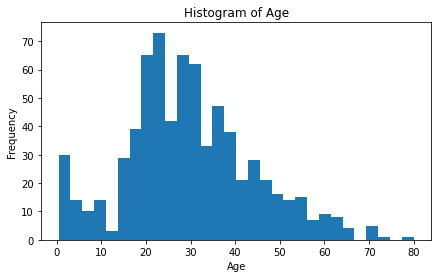


Histogram & basic stats for Fare:
count non-null = 891
mean = 32.20, median = 14.45, std = 49.69


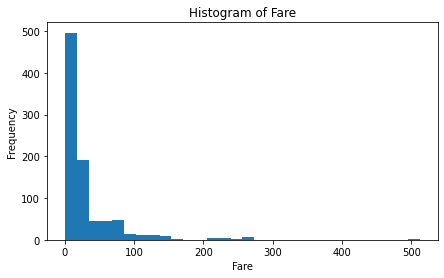

In [10]:
# === 6) Histograms for numeric variables: 'Age' and 'Fare' ===
numeric_cols = ['Age', 'Fare']
for col in numeric_cols:
    print(f"\nHistogram & basic stats for {col}:")
    # basic stats
    non_null = df[col].dropna()
    print(f"count non-null = {non_null.shape[0]}")
    print(f"mean = {non_null.mean():.2f}, median = {non_null.median():.2f}, std = {non_null.std():.2f}")
    # histogram
    plt.figure(figsize=(7,4))
    plt.hist(non_null, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()


Boxplot: Age by Pclass


<Figure size 504x288 with 0 Axes>

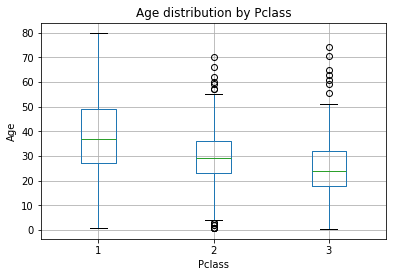


Boxplot: Fare by Pclass


<Figure size 504x288 with 0 Axes>

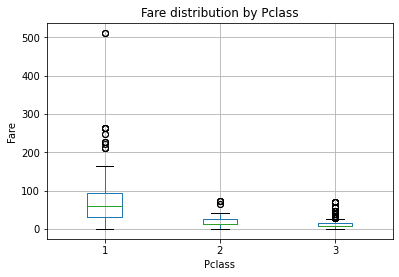

In [11]:
# === 7) Boxplots to inspect distribution and outliers: 'Age' by 'Pclass', 'Fare' by 'Pclass' ===
for target in ['Age', 'Fare']:
    print(f"\nBoxplot: {target} by Pclass")
    plt.figure(figsize=(7,4))
    df.boxplot(column=target, by='Pclass')
    plt.title(f"{target} distribution by Pclass")
    plt.suptitle('')   # remove automatic pandas suptitle
    plt.xlabel("Pclass")
    plt.ylabel(target)
    plt.show()


Scatter plot: Age vs Fare (colored by Survived)


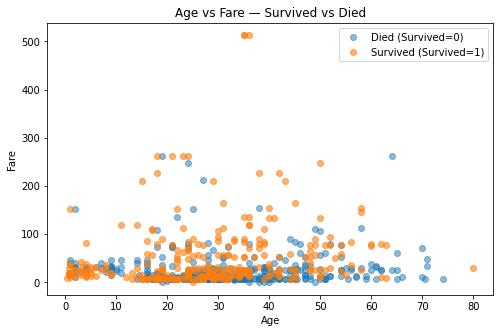

In [12]:
# === 8) Scatter plot Age vs Fare, colored by Survived ===
print("\nScatter plot: Age vs Fare (colored by Survived)")
plt.figure(figsize=(8,5))
survived = df[df['Survived'] == 1]
not_surv = df[df['Survived'] == 0]
plt.scatter(not_surv['Age'], not_surv['Fare'], label='Died (Survived=0)', alpha=0.5)
plt.scatter(survived['Age'], survived['Fare'], label='Survived (Survived=1)', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare — Survived vs Died")
plt.legend()
plt.show()

In [13]:
# === 9) Correlation matrix for numeric features ===
print("\nCorrelation matrix (numeric features):")
num_df = df.select_dtypes(include=[np.number])  # select numeric dtype columns
corr = num_df.corr()                            # correlation matrix
display(corr.round(3))                          # show rounded correlation matrix



Correlation matrix (numeric features):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


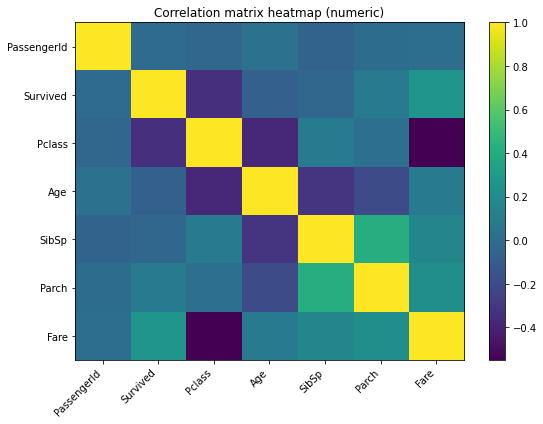

In [14]:
# plot heatmap-like matrix using imshow (simple, no seaborn required)
plt.figure(figsize=(8,6))
plt.imshow(corr.values, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix heatmap (numeric)")
plt.tight_layout()
plt.show()


Pairwise scatter matrix for ['Survived','Pclass','Age','SibSp','Parch','Fare']


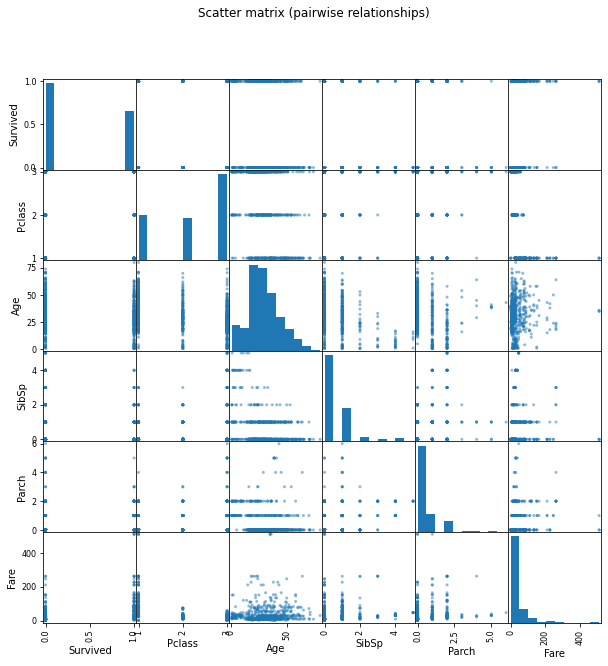

In [15]:
# === 10) Pairwise scatter matrix for selected numeric columns ===
print("\nPairwise scatter matrix for ['Survived','Pclass','Age','SibSp','Parch','Fare']")
pair_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
# drop rows with NA in these columns for a clean pairplot
pair_df = df[pair_cols].dropna()
scatter_matrix(pair_df, figsize=(10,10), diagonal='hist')  # diagonal='hist' draws histograms on diagonal
plt.suptitle("Scatter matrix (pairwise relationships)")
plt.show()


Survival rate by Sex:


,Sex,survival_rate
0,female,0.742038
1,male,0.188908


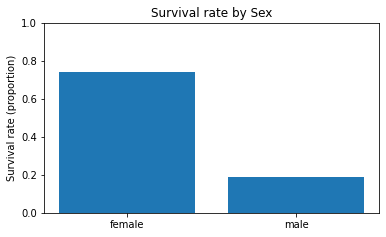

In [16]:
# === 11) Grouped analysis — Survival rate by Sex and by Pclass ===
print("\nSurvival rate by Sex:")
survival_by_sex = df.groupby('Sex')['Survived'].mean().rename('survival_rate').reset_index()
display(survival_by_sex)
plt.figure(figsize=(6,3.5))
plt.bar(survival_by_sex['Sex'], survival_by_sex['survival_rate'])
plt.ylim(0,1)
plt.ylabel("Survival rate (proportion)")
plt.title("Survival rate by Sex")
plt.show()


Survival rate by Pclass:


,Pclass,survival_rate
0,1,0.629630
1,2,0.472826
2,3,0.242363


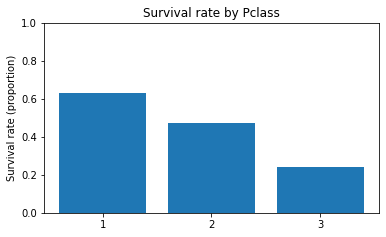

In [17]:
print("\nSurvival rate by Pclass:")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean().rename('survival_rate').reset_index()
display(survival_by_pclass)
plt.figure(figsize=(6,3.5))
plt.bar(survival_by_pclass['Pclass'].astype(str), survival_by_pclass['survival_rate'])
plt.ylim(0,1)
plt.ylabel("Survival rate (proportion)")
plt.title("Survival rate by Pclass")
plt.show()


Survival rate by AgeGroup (binned ages):


C:\Users\HP\AppData\Local\Temp\ipykernel_10776\792207451.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_agegroup = df.groupby('AgeGroup')['Survived'].mean().rename('survival_rate').reset_index()


,AgeGroup,survival_rate
0,0-12,0.579710
1,13-20,0.381818
2,21-35,0.393082
3,36-60,0.400000
4,60+,0.227273


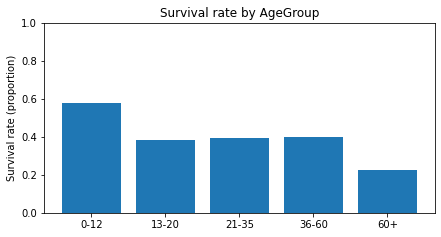

In [18]:
# === 12) Survival by Age groups (bucket ages and compare survival) ===
print("\nSurvival rate by AgeGroup (binned ages):")
age_bins = [0, 12, 20, 35, 60, 120]            # bins for age groups
age_labels = ['0-12', '13-20', '21-35', '36-60', '60+']  # labels for bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)  # create AgeGroup column
surv_by_agegroup = df.groupby('AgeGroup')['Survived'].mean().rename('survival_rate').reset_index()
display(surv_by_agegroup)
plt.figure(figsize=(7,3.5))
plt.bar(surv_by_agegroup['AgeGroup'].astype(str), surv_by_agegroup['survival_rate'])
plt.ylim(0,1)
plt.ylabel("Survival rate (proportion)")
plt.title("Survival rate by AgeGroup")
plt.show()

In [21]:
# === 13) Save all figures and summary pages into a multi-page PDF ===
pdf_path = "titanic_eda_report.pdf"   # path where PDF will be saved
with PdfPages(pdf_path) as pdf:
    # cover page (text)
    fig = plt.figure(figsize=(8.27, 11.69))     # A4 size
    plt.axis('off')
    plt.text(0.02, 0.95, "Titanic Dataset — Exploratory Data Analysis (EDA)", fontsize=18, va='top')
    plt.text(0.02, 0.88, "Tools: Python (pandas, matplotlib)", fontsize=12, va='top')
    plt.text(0.02, 0.82, "This report contains tables, plots, and observations from the Titanic train.csv dataset.", fontsize=10, va='top')
    pdf.savefig()
    plt.close()

    # info table page
    fig, ax = plt.subplots(figsize=(8.27, 4))
    ax.axis('off')
    tbl = ax.table(cellText=info_df.values, colLabels=info_df.columns, loc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(9)
    tbl.scale(1, 1.4)
    pdf.savefig()
    plt.close()

    # summary statistics page
    fig, ax = plt.subplots(figsize=(8.27, 4.5))
    ax.axis('off')
    tbl = ax.table(cellText=desc.round(3).values, colLabels=desc.columns, rowLabels=desc.index, loc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(8.5)
    tbl.scale(1, 1.2)
    pdf.savefig()
    plt.close()

    # missing values bar chart
    fig, ax = plt.subplots(figsize=(8,4))
    missing_df['missing_count'].plot(kind='bar', ax=ax)
    ax.set_title("Missing values per column (counts)")
    ax.set_ylabel("Count")
    ax.set_xlabel("Column")
    plt.xticks(rotation=45, ha='right')
    pdf.savefig()
    plt.close()

    # value counts charts for each category
    for c in cats:
        fig, ax = plt.subplots(figsize=(6,2.5))
        df[c].value_counts(dropna=False).plot(kind='bar', ax=ax)
        ax.set_title(f"Value counts: {c}")
        ax.set_ylabel("Count")
        ax.set_xlabel(c)
        plt.xticks(rotation=0)
        pdf.savefig()
        plt.close()

    # histograms for Age and Fare
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(7,4))
        ax.hist(df[col].dropna(), bins=30)
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        pdf.savefig()
        plt.close()

    # boxplots
    for target in ['Age', 'Fare']:
        fig, ax = plt.subplots(figsize=(7,4))
        df.boxplot(column=target, by='Pclass', ax=ax)
        ax.set_title(f"{target} distribution by Pclass")
        ax.set_xlabel("Pclass")
        ax.set_ylabel(target)
        plt.suptitle('')
        pdf.savefig()
        plt.close()

    # scatter Age vs Fare colored by Survived
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(not_surv['Age'], not_surv['Fare'], label='Died', alpha=0.5)
    ax.scatter(survived['Age'], survived['Fare'], label='Survived', alpha=0.6)
    ax.set_xlabel("Age")
    ax.set_ylabel("Fare")
    ax.set_title("Age vs Fare — Survived vs Died")
    ax.legend()
    pdf.savefig()
    plt.close()

    # correlation heatmap
    fig, ax = plt.subplots(figsize=(8,6))
    cax = ax.imshow(corr.values, interpolation='nearest', aspect='auto')
    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha='right')
    ax.set_yticklabels(corr.columns)
    fig.colorbar(cax)
    ax.set_title("Correlation matrix heatmap (numeric)")
    pdf.savefig()
    plt.close()

    # scatter matrix (pairwise)
    fig = plt.figure(figsize=(10,10))
    scatter_matrix(pair_df, figsize=(10,10), diagonal='hist')
    pdf.savefig()
    plt.close()

    # survival rate by sex
    fig, ax = plt.subplots(figsize=(6,3.5))
    ax.bar(survival_by_sex['Sex'], survival_by_sex['survival_rate'])
    ax.set_ylim(0,1)
    ax.set_ylabel("Survival rate (proportion)")
    ax.set_title("Survival rate by Sex")
    pdf.savefig()
    plt.close()

    # survival rate by pclass
    fig, ax = plt.subplots(figsize=(6,3.5))
    ax.bar(survival_by_pclass['Pclass'].astype(str), survival_by_pclass['survival_rate'])
    ax.set_ylim(0,1)
    ax.set_ylabel("Survival rate (proportion)")
    ax.set_title("Survival rate by Pclass")
    pdf.savefig()
    plt.close()

    # survival by age group
    fig, ax = plt.subplots(figsize=(7,3.5))
    ax.bar(surv_by_agegroup['AgeGroup'].astype(str), surv_by_agegroup['survival_rate'])
    ax.set_ylim(0,1)
    ax.set_ylabel("Survival rate (proportion)")
    ax.set_title("Survival rate by AgeGroup")
    pdf.savefig()
    plt.close()

    # observations summary page
    observations = [
        "Observations & Key Findings:",
        "- Missing values: 'Age' and 'Cabin' have substantial missing data; 'Cabin' has the most missing entries.",
        "- Sex & Survival: Females have a significantly higher survival rate than males.",
        "- Pclass & Survival: 1st class passengers had higher survival rates than 2nd and 3rd class.",
        "- Age: Children (0-12) show relatively high survival proportions.",
        "- Fare: Fare distribution is right-skewed; some high-value outliers exist.",
        "- Correlations: 'Pclass' correlates with 'Fare'; associations with 'Survived' are present but moderate."
    ]
    fig = plt.figure(figsize=(8.27, 11.69))
    plt.axis('off')
    y = 0.95
    plt.text(0.02, y, "Summary of observations", fontsize=16, va='top')
    y -= 0.05
    for line in observations:
        plt.text(0.02, y, line, fontsize=11, va='top')
        y -= 0.045
    pdf.savefig()
    plt.close()

print(f"\nEDA complete — PDF report saved to: {pdf_path}")



EDA complete — PDF report saved to: titanic_eda_report.pdf


<Figure size 720x720 with 0 Axes>